In [5]:
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front,plot_biobjective_singleparameter
from rbibm.utils.utils_data import get_sweep_dataset, query, query_main, query_rob_metric
from rbibm.plots.styles import use_style
import matplotlib.pyplot as plt
import matplotlib.colors as colors
name = "main_sweeps"
df = get_sweep_dataset(name)

In [6]:
import torch

In [7]:
vmin = 0.0001
vmax = 20

In [8]:
figsize_col=2.05
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

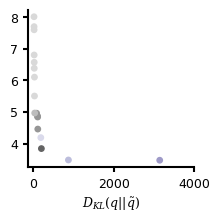

In [324]:
df_main = query(name="super_final_sweep_hh2", expand_params_defense=True)
df_main = df_main[["params_defense_beta", "main_value_rob", "test_loss"]]
df_main = df_main.drop_duplicates()
betas = df_main.params_defense_beta.to_numpy()
test_loss = df_main.test_loss.to_numpy()
rob = df_main.main_value_rob.to_numpy()
mask = rob > 0.
betas = betas[mask]
test_loss = test_loss[mask]
rob = rob[mask]

from paretoset import paretoset
import pandas as pd

vals = pd.DataFrame({"test_loss": test_loss, 
                       "rob": rob})
mask = paretoset(vals, sense=["min", "min"], distinct=False)

betas = betas[mask]
test_loss = test_loss[mask]
rob = rob[mask]
with use_style("pyloric"):
    fig = plt.figure(figsize=(figsize_col + 0.1,figsize_col))
    plt.scatter(rob, test_loss, c=betas, norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap="tab20c", s=15)
    plt.xticks([0, 2000,4000])
    #plt.xlim(0,2000)
    plt.xlabel("$D_{KL}(q||\\tilde{q})$")
    fig.savefig("hh_tradeoff.svg")

In [9]:
df

,objective,sweeper,direction,search_space,overrides,best_params,best_value
0,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=sir', 'eval_rob...","[{'defense.params.beta': 12.91788229674371}, {...","[[0.000991368549875915, 3.6150431632995605], [..."
1,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=lotka_volterra'...","[{'defense.params.beta': 10.976270123665143}, ...","[[0.00036017788806930184, 2.515634298324585], ..."
2,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=vae_task', 'eva...","[{'defense.params.beta': 19.27325521365431}, {...","[[0.000651144131552428, 3.2256019115448], [0.0..."
3,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=spatial_sir', '...","[{'defense.params.beta': 8.751744281495128}, {...","[[0.00033004253054969013, 1.1331864595413208],..."
4,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=gaussian_linear...","[{'defense.params.beta': 10.976270123665143}, ...","[[0.01718483492732048, 13.201838493347168], [0..."


Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=gaussian_linear', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


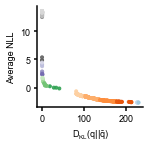

In [21]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 4, figsize=(figsize_col + 0.1,figsize_col), color_label="$\\beta$", cmap="tab20c", vmin=vmin,vmax=vmax, color_bar=False)
    axes.set_ylabel("Average NLL")
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("VAE")
    #axes.set_xlim(-1,20)
    axes.set_xticks([0,100,200])
    plt.show()
    fig.savefig("gl_tradeoff.svg", transparent=True)

In [ ]:
ax

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=vae_task', 'eval_rob.eps=2.0', 'model=maf_pyro', 'model/embedding_net=mlp', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


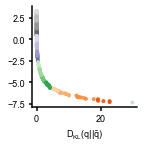

In [12]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 2, figsize=(figsize_col + 0.1,figsize_col), color_label="$\\beta$", cmap="tab20c", vmin=vmin,vmax=vmax, color_bar=False)
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("VAE")
    #axes.set_xlim(-2,40)
    plt.show()
    fig.savefig("vae_tradeoff.svg", transparent=True)

In [149]:
#fig,axes = plot_biobjective_singleparameter(name, 15, figsize=(figsize_col,figsize_col- 0.1), color_label="$\\beta$", cmap="tab20c", vmin=vmin, vmax=vmax, color_bar=False)

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=lotka_volterra', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


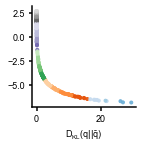

In [14]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 1, figsize=(figsize_col +0.1,figsize_col), color_label="$\\beta$", cmap="tab20c", vmin=vmin, vmax=vmax, color_bar=False)
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("Lotka volterra")
    #axes.set_xlim(0, 2)
    #axes.set_xticks([0.,1.,2.])
    plt.show()
    fig.savefig("lv_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=sir', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


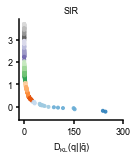

In [19]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 0, color_bar=False, figsize=(figsize_col,figsize_col), color_label="$\\beta$",vmin=vmin,vmax=vmax, cmap="tab20c")
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    axes.set_title("SIR")
    axes.set_xlim(-15,300)
    axes.set_xticks([0.,150,300])
    plt.show()
    #fig.savefig("sir_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['-m', 'name=main_sweeps', 'defense=fisher_trace', 'task=hudgkin_huxley', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'defense.params.algorithm=ema', 'device=cuda', 'partition=cuda', 'run_eval_approx=false']


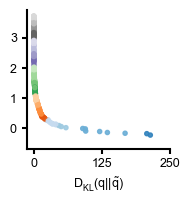

In [158]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 75, color_bar=False,figsize=(figsize_col,figsize_col), color_label="$\\beta$", vmin=vmin,vmax=vmax, cmap="tab20c")
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("Hodgkin huxley")
    axes.set_xlim(-13,250)
    axes.set_xticks([0.,125,250])
    plt.show()
    fig.savefig("hh_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['-m', 'name=main_sweeps', 'defense=fisher_trace', 'task=spatial_sir', 'eval_rob.eps=2.', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'model/embedding_net=mlp', 'defense.params.algorithm=ema', 'device=cuda', 'partition=cuda', 'run_eval_approx=false']


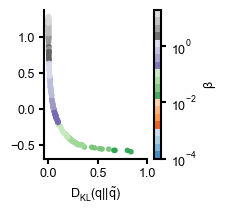

In [262]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 82, figsize=(figsize_col + 0.4,figsize_col + 0.1), color_label="$\\beta$",color_bar=True, vmin=vmin,vmax=vmax, cmap="tab20c")
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("Spatial sir")
    #axes.set_xlim(-0.035,1.)
    axes.set_xticks([0,0.5,1.])
    plt.show()
    fig.savefig("spatial_sir_tradeoff.svg", transparent=True)